# Irriducible Mass of a BH

This is an example that comes straight out of my research in general relativity. This paper:

Gerosa, Fabbri, Sperhake (2022) "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848) 

(some of the calculations there were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. (At home...)  Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, uniform
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
N  = 10000

In [3]:
def littlef(chi):
    return np.sqrt((1+np.sqrt(1-chi**2))/2)

### Visualize f

Text(0.5, 1.0, '$f(\\chi)$')

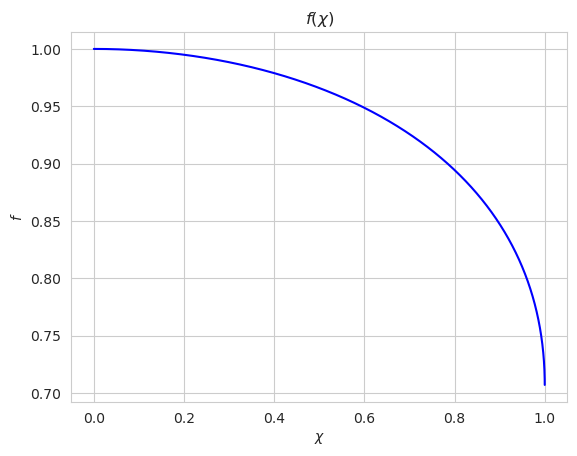

In [4]:
chi = np.linspace(0, 1, N)
f = littlef(chi)

plt.plot(chi, f, color='blue')
plt.xlabel('$\chi$')
plt.ylabel('$f$')
plt.title('$f(\chi)$')

Check if the distribution of $f$ is correct (comparing by its pdf written above)

In [5]:
def p_f(f):
    return 2*(2*f**2 - 1)/(np.sqrt(1-f**2))

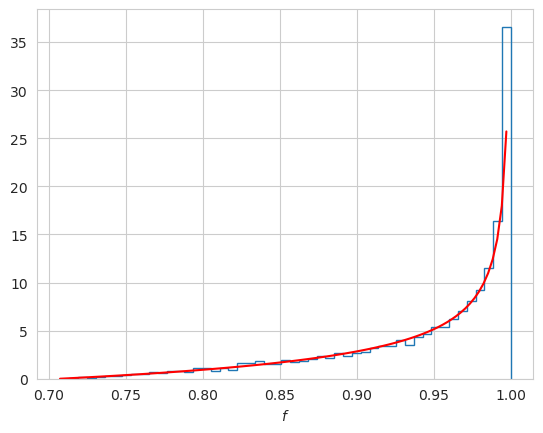

In [6]:
chis = np.random.uniform(0, 1, N)[:-1] # Throw the last element 1 that will give problems
f  = littlef(chis)
plt.hist(f, bins=50, density=True, histtype='step')

f  = np.linspace(1/2**0.5, 1, 100)[:-1]
pdff = p_f(f)
plt.plot(f, pdff, color='red')

plt.xlabel('$f$')

plt.show()

### Distribution of the masses

In [7]:
mu = 1
sigma = 0.02

Text(0.5, 1.0, 'Masses Distribution')

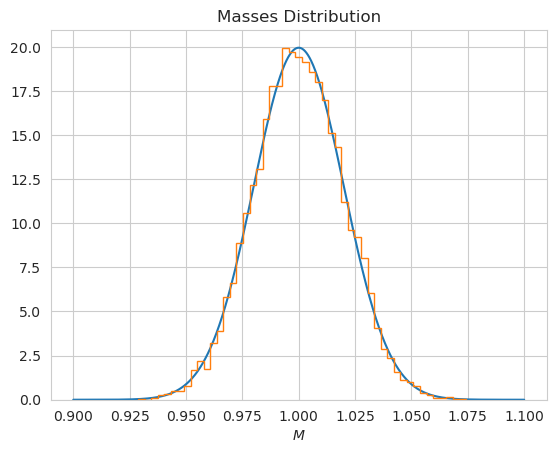

In [8]:
x = np.linspace(1-5*sigma, 1+5*sigma, N) 
M = norm.pdf(x, mu, sigma)
plt.plot(x, M)

M = np.random.normal(mu, sigma, N)
plt.hist(M, density=True, bins=50, histtype='step')

plt.xlabel('$M$')
plt.title('Masses Distribution')

Text(0.5, 1.0, 'Irriducible Mass Distribution')

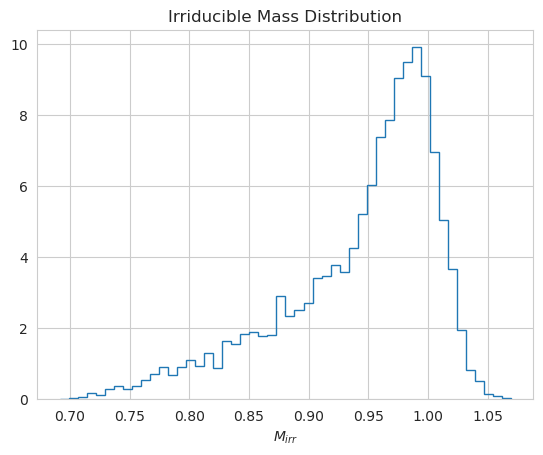

In [9]:
chi = np.random.uniform(0, 1, N)
f   = littlef(chi)

Mirr = M*f

plt.hist(Mirr, histtype='step', density=True, bins=50)
plt.xlabel('$M_{irr}$')
plt.title('Irriducible Mass Distribution')

I try to plot using the **"Freedmann-Diaconis rule"**:

$$
    \Delta_b = \frac{2(q_{75} - q{25})}{N^{1/3}} = \frac{2.7 \sigma_G}{N^{1/3}}
$$

I can compute $\sigma_G$ as:

In [10]:
from astroML import stats as astroMLstats
sigma_G = astroMLstats.sigmaG(Mirr)
print(sigma_G)

0.06059580533802473


In [11]:
binsize = 2.7 * sigma_G / (N**(1/3))
print(binsize)

0.007594041962360231


In [12]:
binsMirr = np.append(np.arange(start=Mirr.min(), stop = Mirr.max(), step=binsize), Mirr.max())

Text(0.5, 1.0, 'Freedman-Diaconis rule')

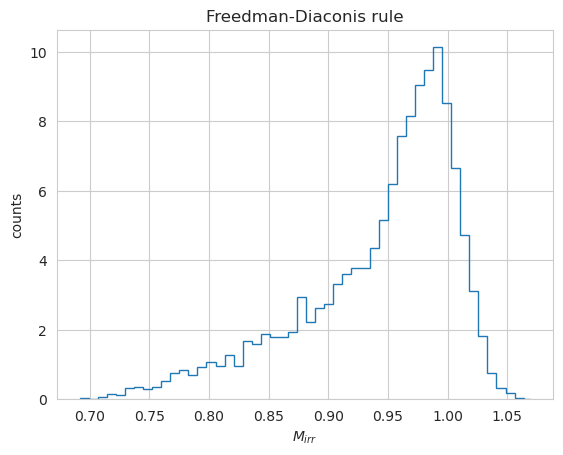

In [13]:
_ = plt.hist(Mirr, bins=binsMirr, density=True, histtype='step')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('counts')
plt.title('Freedman-Diaconis rule')

In [14]:
from astropy.visualization.hist import hist as fancyhist

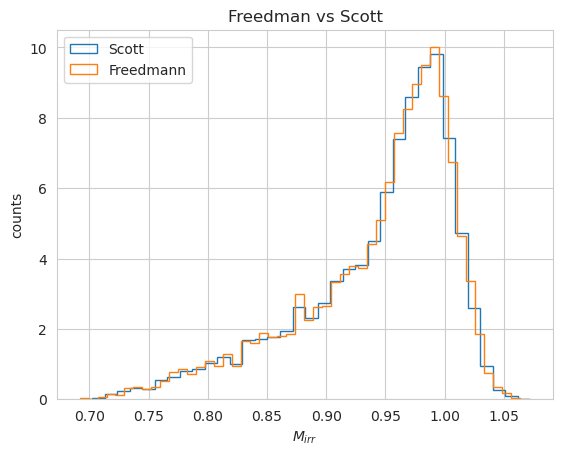

In [15]:
_ = fancyhist(Mirr, bins="scott",    histtype="step", density=True, label='Scott')
_ = fancyhist(Mirr, bins="freedman", histtype="step", density=True, label='Freedmann')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('counts')
plt.title('Freedman vs Scott')
plt.legend()

### Rug plot

Text(0.5, 1.0, 'Rug Plot')

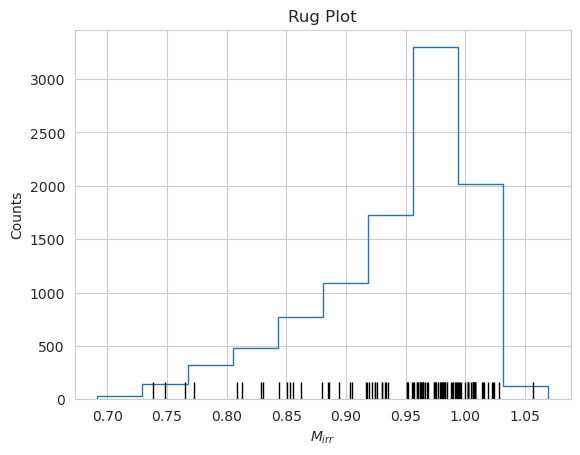

In [16]:
plt.hist(Mirr, histtype='step')
plt.plot(Mirr[:100], 0*Mirr[:100], '|', color='k', markersize=25)

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Counts')
plt.title('Rug Plot')

## Kernel Density Estimation (KDE)

In [17]:
from sklearn.neighbors import KernelDensity

In [18]:
Mgrid = np.linspace(Mirr.min(), Mirr.max(), 1000)

In [19]:
def kde_sklearn(data, bandwidth = 0.001, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(Mgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

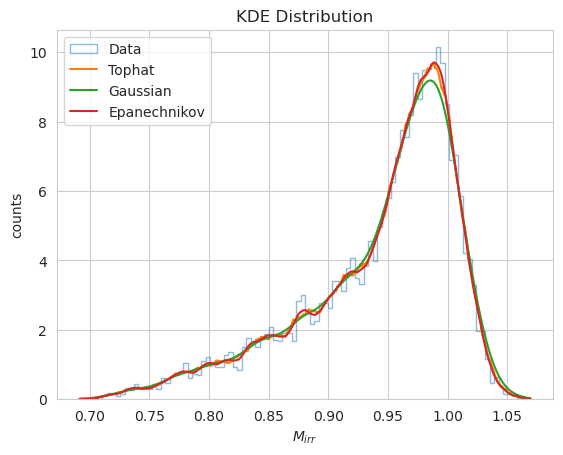

In [20]:
PDF_tophat = kde_sklearn(Mirr, bandwidth=0.01, kernel='tophat')
PDF_gauss  = kde_sklearn(Mirr, bandwidth=0.01, kernel='gaussian')
PDF_epanec = kde_sklearn(Mirr, bandwidth=0.01, kernel='epanechnikov')

plt.hist(Mirr, density=True, histtype='step', bins=100, alpha=0.5, label='Data')
plt.plot(Mgrid, PDF_tophat, label='Tophat')
plt.plot(Mgrid, PDF_gauss, label='Gaussian')
plt.plot(Mgrid, PDF_epanec, label='Epanechnikov')


plt.xlabel(r'$M_{irr}$')
plt.ylabel('counts')
plt.title('KDE Distribution')
plt.legend()

In [21]:
from scipy.stats import ks_2samp, kstest

## Compute the KS distance between $M_{irr}$ and $f$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$

### SMALL $\sigma$

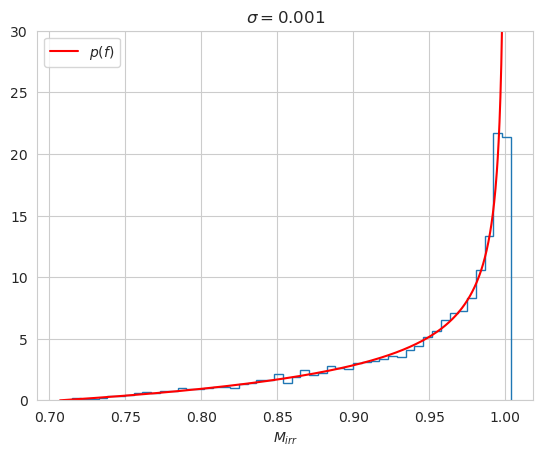

In [22]:
sigma1 = 1e-3
chi    = np.random.uniform(0, 1, N)
f      = littlef(chi)
M      = np.random.normal(mu, sigma1, N)
Mirr1  = M * f

f_s    = np.linspace(1/2**0.5, 1, 1000)[:-1]
pdf_f  = p_f(f_s)

plt.hist(Mirr1, density=True, bins=50, histtype='step')
plt.plot(f_s, pdf_f, color='red', label='$p(f)$')

plt.title(f'$\sigma = {sigma1}$')
plt.xlabel('$M_{irr}$')
plt.ylim(0,30)
plt.legend()

## Big $\sigma$

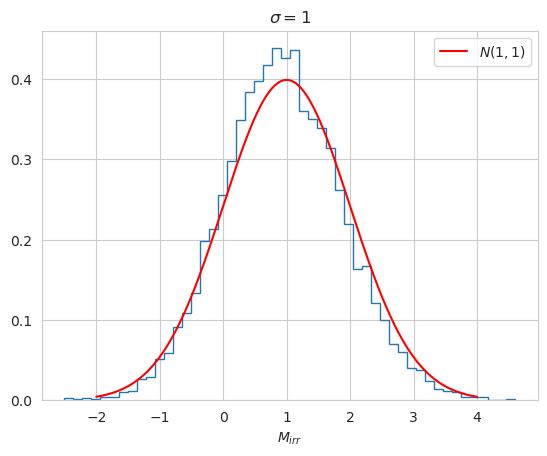

In [23]:
sigma2 = 1
chi    = np.random.uniform(0, 1, N)
f      = littlef(chi)
M      = np.random.normal(mu, sigma2, N)
Mirr2  = M * f

M_grid = np.linspace(mu-3*sigma2, mu+3*sigma2, 1000)
M_dist = norm.pdf(M_grid, mu, sigma2)

plt.hist(Mirr2, density=True, bins=50, histtype='step')
plt.plot(M_grid, M_dist, color='red', label='$N(1, 1)$')

plt.title(f'$\sigma = {sigma2}$')
plt.xlabel('$M_{irr}$')
plt.legend()

In [24]:
# We first need to define $f$.
def f(chi):
    
    return np.sqrt((1 + np.sqrt(1-chi**2))/2)

Then set the values for the $\sigma$.

In [25]:
sigmas = np.logspace(-5, 5, 50)

In [26]:
ksM = []
ksf = []
for s in sigmas:
    Chis   = np.random.uniform(0, 1, N)
    f_     = f(Chis)
    Masses = np.random.normal(loc=1, scale=s, size=N)
    
    ksM.append(ks_2samp(Masses, Masses*f_))
    ksf.append(ks_2samp(f_, Masses*f_))

ksM = np.array(ksM)
ksf = np.array(ksf)

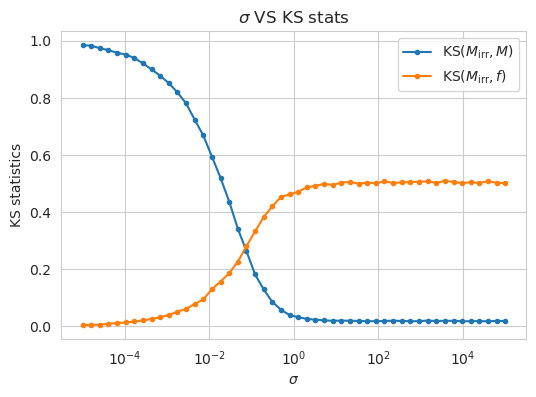

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(sigmas, ksM[:,0], marker='.', label='KS$(M_{\\rm irr}, M)$')
plt.plot(sigmas, ksf[:,0], marker='.', label='KS$(M_{\\rm irr}, f)$')
# plt.axvline(x=mu, linestyle='--', color='red', label='$\mu$')
plt.semilogx()
plt.xlabel(r'$\sigma$')
plt.ylabel('KS statistics')
plt.title(r'$\sigma$ VS KS stats')
plt.legend()

We have two different behaviours:
- On the right we have that the most probable model is for $M_{irr}$ to be distributed like $f$ (KS $\rightarrow$ 0)
- On the left we have that the most probable model is for $M_{irr}$ to be distributed like $M$ (KS $\rightarrow$ 0)

## Check with the analytic distribution

In [28]:
# Function inside the integral
def funzione(M_irr, f, mu, sigma):
    return np.exp(- (M_irr/f - mu)**2/(2*sigma**2)) * (2*f**2 - 1)/(f*np.sqrt(1-f**2))

In [32]:
f_s = np.linspace(1/np.sqrt(2), 0.999999, 10000)
Mirr_sorted = np.sort(Mirr)

In [33]:
integrals = np.sqrt(2/np.pi)/sigma * np.array([np.trapz(funzione(irr_mass, f_s, mu, sigma), dx=f_s[1]-f_s[0]) for irr_mass in Mirr_sorted])

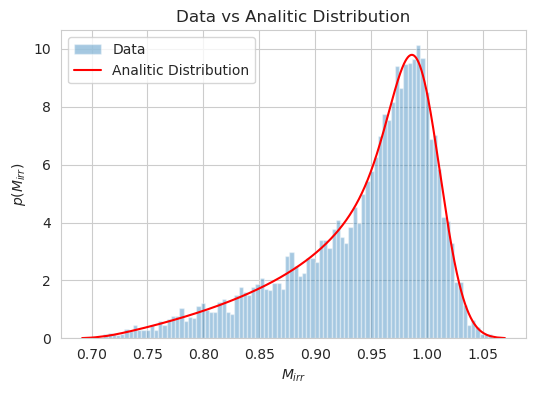

In [34]:
plt.figure(figsize=(6, 4))

plt.hist(Mirr, density=True, bins=100, alpha=0.4, label='Data')
plt.plot(Mirr_sorted, integrals, color='red', label='Analitic Distribution')
plt.xlabel('$M_{irr}$')
plt.ylabel('$p(M_{irr})$')
plt.title('Data vs Analitic Distribution')
plt.legend()
